# **Final Project**

### **Group 1**

### **A. Introduction**

**Team Members:**
- Maurits Tobing *as a Data Engineer*
- Iznia Azyati *as a Data Scientist*
- Talitha Salsabila *as a Data Analyst*


**Dataset**: [Coursera Courses Dataset](https://www.kaggle.com/datasets/muhammadanasmahmood/coursera-courses-dataset)

**Hugging Face**: [GuideMe - Course Recommender System](https://huggingface.co/spaces/MARVT/GuideMe_CourseRecommenderSystem_FinalProject)



---


**Problem Statement**

Students often face challenges in finding courses that align with their specific interests. The process of manually searching through extensive course catalogs can be time-consuming and overwhelming. Additionally, students may have difficulty identifying courses taught by particular instructors or covering specific topics. There is a need for an efficient and accurate solution to streamline this search process and connect students with their desired courses quickly.

**GuideMe** is a recommender system project designed to help students find their desired courses using input search. By leveraging Natural Language Processing (NLP) with Word2Vec methods, GuideMe aims to efficiently connect students with courses that best match their interests and preferences.


**Objectives**:

To provide accurate recommedations to users, GuideMe is optimized through the following steps:
- Analyze 4 text columns (title, description, instructors, modules) by employing NLP with Word2Vec methods.
- Measure similarity between text input and the dataset using Cosine Similarity to find the best match.
- Recommend courses to users with similarity score above XX.


**Dataset Overview**

The dataset is acquired from Kaggle [Coursera Courses Dataset](https://www.kaggle.com/datasets/muhammadanasmahmood/coursera-courses-dataset) and through web scraping the online learning platform, Coursera. Visit the [Coursera Homepage](https://coursera.org/) to explore more the available courses.

---

#### **Kolom yang Akan Di-NLP-kan**

**1. Title (title)**
  - Penjelasan: Nama kursus memberikan gambaran singkat tentang topik utama kursus tersebut.
  - NLP Task: Ekstraksi fitur, analisis kata kunci, dan pembobotan berdasarkan kemiripan kata.

**2. Description (description)**
  - Penjelasan: Deskripsi kursus memberikan detail tentang apa yang akan dipelajari oleh peserta kursus.
  - NLP Task: Analisis sentimen, pengelompokan tematik, dan pembobotan kata untuk mengukur relevansi.

**3. Modules (modules)**
- Penjelasan: Informasi tentang modul kursus memberikan gambaran lebih mendetail mengenai isi dan struktur kursus.
- NLP Task: Ekstraksi fitur, analisis topik, dan pembobotan kata untuk menentukan relevansi dengan input pengguna.

**4. Instructor (instructor)**
- Penjelasan: Nama instruktur memberikan informasi tentang siapa yang mengajar kursus.
- NLP Task: Ekstraksi fitur dan analisis kata kunci untuk memastikan bahwa nama instruktur relevan dengan pencarian pengguna.

### **B. Libraries**


Import Library yang dibutuhkan

In [9]:
# Import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from langdetect import detect, LangDetectException, DetectorFactory

# Download stopwords and punkt tokenizer for nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **C. Data Loading & Data Checking**


#### **1. Load Dataset**

In [21]:
# Load the CSV file
df = pd.read_csv('coursera_dataset.csv')

In [11]:

# Display the first 5 rows
df.head(5)

,title,category,type,level,description,price,rating,duration,language,prerequisites,syllabus,modules,instructor,certificate_type,association,image,url,timestamp
0,Networking in Google Cloud Specialization,Networking,specializations,Intermediate Level,This specialization gives participants broad s...,free,4.8,Approximately 4 months to complete,English,no prerequisites needed,No specify data,Google Cloud Fundamentals: Core Infrastructure...,Google Cloud Training,Shareable Certificate,Google Cloud,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/specializations/netwo...,2022-07-29 23:58:34
1,Two Speed IT: How Companies Can Surf the Digit...,Business Essentials,course,Beginner Level,"Transform or disappear, the Darwinism of IT: I...",free,4.3,Approx. 14 hours to complete,English,no prerequisites needed,Introduction Start here! IT and the CIO in t...,Introduction ; IT and the CIO in the Digital W...,Antoine Gourévitch ; Vanessa Lyon ; Eric Baudson,Shareable Certificate,CentraleSupélec,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/2-speed-it,2022-07-29 23:58:34
2,Fundamentals of Network Communication,Computer Security and Networks,course,Intermediate Level,"In this course, we trace the evolution of netw...",free,4.6,Approx. 15 hours to complete,English,no prerequisites needed,Communication Networks and Services This modu...,Communication Networks and Services ; Layered ...,Xiaobo Zhou ; University of Colorado System,Shareable Certificate,University of Colorado System,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/fundamentals-ne...,2022-07-29 23:58:54
3,Design a User Experience for Social Good & Pre...,Design and Product,course,Beginner Level,Design a User Experience for Social Good and P...,free,4.8,Approx. 71 hours to complete,English,no prerequisites needed,"Starting the UX design process: empathize, def...",Design for social good and strengthen your por...,Google Career Certificates,Shareable Certificate,Google,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/ux-design-jobs,2022-07-29 23:59:20
4,Building Database Applications in PHP,Mobile and Web Development,course,Intermediate Level,"In this course, we'll look at the object orien...",free,4.9,Approx. 24 hours to complete,English,no prerequisites needed,PHP Objects We look at the object oriented pa...,PHP Objects ; Connecting PHP and MySQL ; PHP C...,Charles Russell Severance,Shareable Certificate,University of Michigan,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/database-applic...,2022-07-29 23:59:20


In [12]:
# Show the last 5 data
df.tail(5)

,title,category,type,level,description,price,rating,duration,language,prerequisites,syllabus,modules,instructor,certificate_type,association,image,url,timestamp
198,Data Science: Foundations using R Specialization,Data Analysis,specializations,Beginner Level,"Ask the right questions, manipulate data sets,...",free,4.6,Approximately 5 months to complete,English,no prerequisites needed,No specify data,The Data Scientist’s Toolbox ; R Programming ;...,"Roger D. Peng, PhD ; Brian Caffo, PhD",Shareable Certificate,General,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/specializations/data-...,2022-07-30 00:45:32
199,IBM Data Science Professional Certificate,Data Analysis,professional certificates,Beginner Level,Data science is one of the hottest professions...,free,4.6,Approximately 11 months to complete,English,no prerequisites needed,No specify data,Get exclusive access to career resources upon ...,IBM Skills Network Team ; Dr. Pooja ; Abhishek...,Shareable Certificate,IBM Skills Network,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/professional-certific...,2022-07-30 00:45:32
200,Data Science Specialization,Data Analysis,specializations,Beginner Level,"Ask the right questions, manipulate data sets,...",free,4.5,Approximately 11 months to complete,English,no prerequisites needed,No specify data,The Data Scientist’s Toolbox ; R Programming ;...,"Roger D. Peng, PhD ; Brian Caffo, PhD ; Jeff L...",Shareable Certificate,General,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/specializations/jhu-d...,2022-07-30 00:45:32
201,Introduction to Physical Chemistry,Chemistry,course,Beginner Level,Chemical reactions underpin the production of ...,free,4.7,Approx. 19 hours to complete,English,no prerequisites needed,Thermodynamics I This module explores thermod...,Thermodynamics I ; Thermodynamics II ; Virtual...,"Patrick J O'Malley, D.Sc ; Michael W. Anderson...",Shareable Certificate,University of Manchester,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/physical-chemistry,2022-07-30 00:45:41
202,Introduction to Chemistry: Structures and Sol...,Chemistry,course,Beginner Level,This is an introductory course for students wi...,free,4.7,Approx. 17 hours to complete,English,no prerequisites needed,"light We will cover introduction to light, Bo...","Review Videos (I) ; light ; Quantum Number, Le...",Prof. Dorian A. Canelas,Shareable Certificate,Duke University,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/basic-chemistry,2022-07-30 00:45:42


In [13]:
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             203 non-null    object 
 1   category          203 non-null    object 
 2   type              203 non-null    object 
 3   level             203 non-null    object 
 4   description       203 non-null    object 
 5   price             203 non-null    object 
 6   rating            203 non-null    float64
 7   duration          203 non-null    object 
 8   language          203 non-null    object 
 9   prerequisites     203 non-null    object 
 10  syllabus          203 non-null    object 
 11  modules           203 non-null    object 
 12  instructor        203 non-null    object 
 13  certificate_type  203 non-null    object 
 14  association       203 non-null    object 
 15  image             203 non-null    object 
 16  url               203 non-null    object 
 1

Dataset terdiri dari 17 kolom bertipe `object` dan 1 kolom dengan tipe `float`

In [14]:
# Check missing values
df.isnull().sum()

title               0
category            0
type                0
level               0
description         0
price               0
rating              0
duration            0
language            0
prerequisites       0
syllabus            0
modules             0
instructor          0
certificate_type    0
association         0
image               0
url                 0
timestamp           0
dtype: int64

Tidak ada missing value pada dataset ini, karena sebelumnya sudah dicleaning pada proses preparation.

<Axes: >

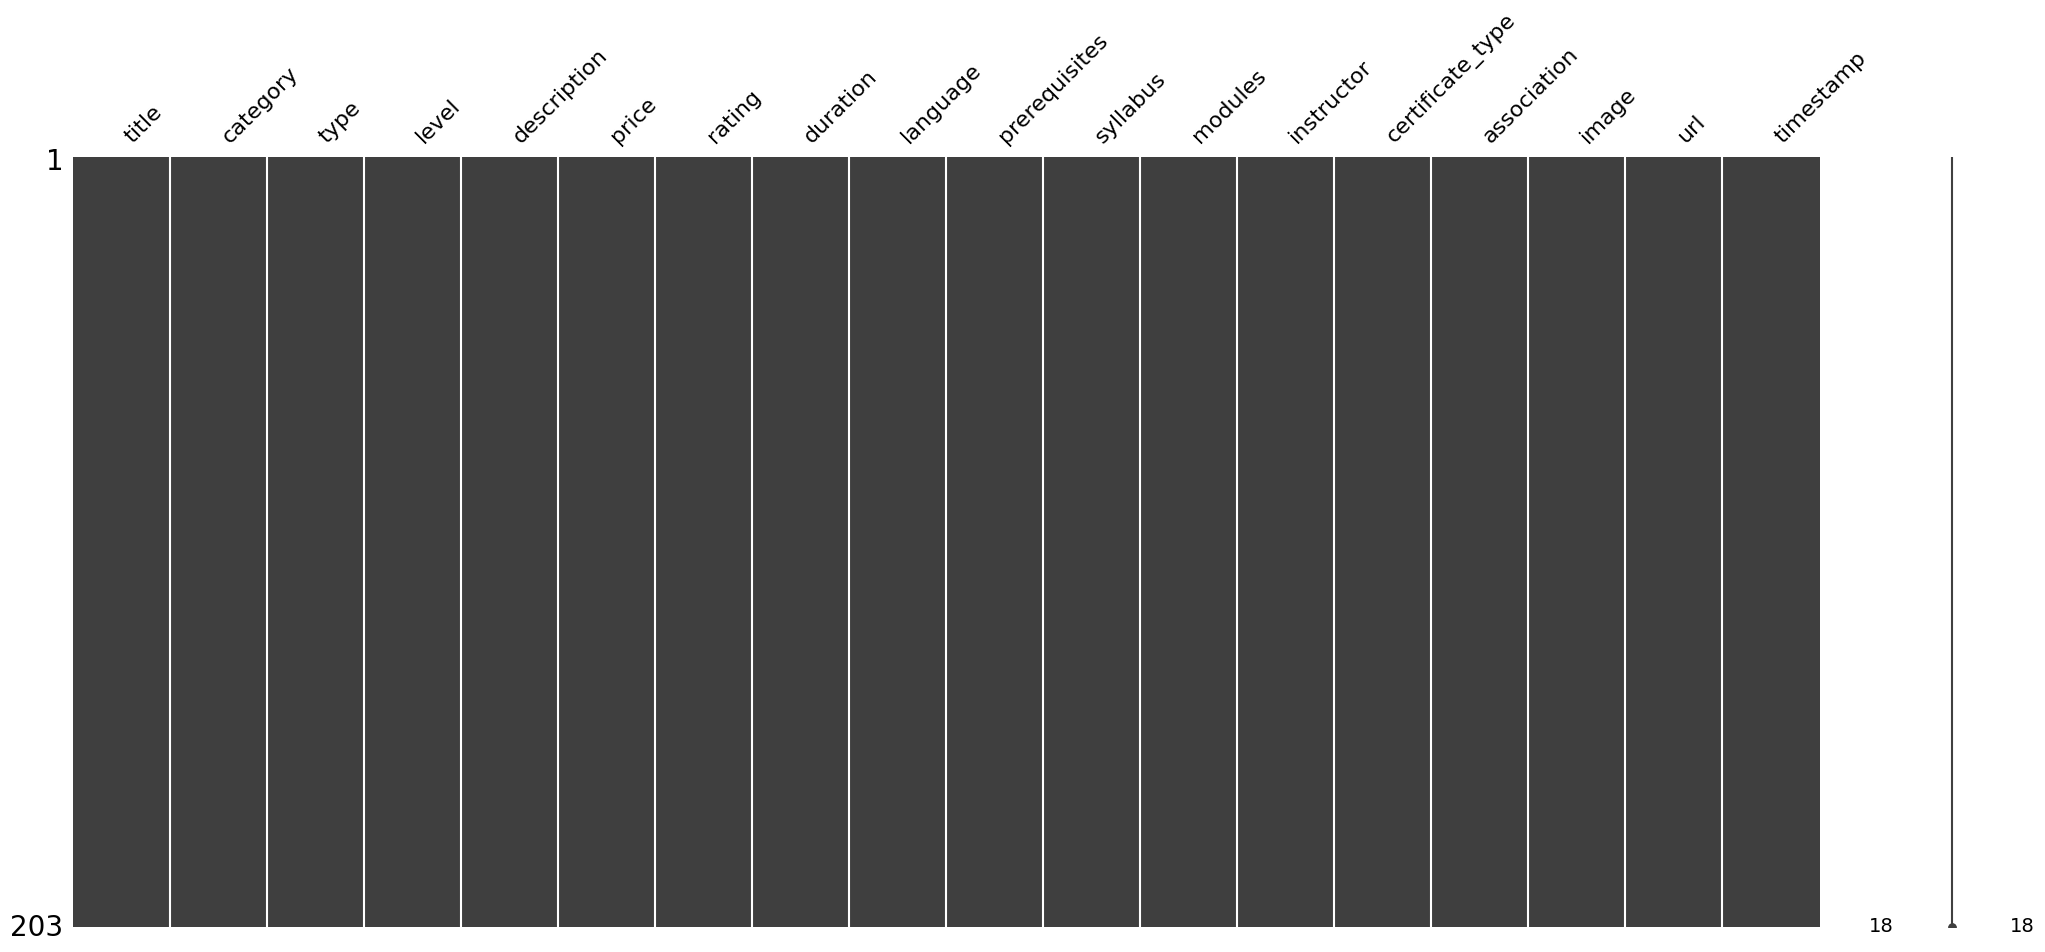

In [16]:
# Visualize the missing data
msno.matrix(df)

Setelah identifikasi missing value, langkah selanjutnya adalah cek duplikat rows dalam dataset dengan `duplicated().sum()`

#### **2. Check for Duplicates**

In [17]:
# Check total of duplicated rows
df.duplicated().sum()

0

Hasilnya dikonfirmasi bahwa tidak ada baris yang duplikat pada dataset.

#### **3. Check Column Names**

In [22]:
# Check column names
df.columns

Index(['title', 'category', 'type', 'level', 'description', 'price', 'rating',
       'duration', 'language', 'prerequisites', 'syllabus', 'modules',
       'instructor', 'certificate_type', 'association', 'image', 'url',
       'timestamp'],
      dtype='object')

### **D. Feature Engineering**

#### **1. Drop Kolom yang Tidak Relevan**

Setelah data loading dan data checking, selanjutnya dilakukan preprocessing teks pada kolom-kolom yang relevan seperti `title`, `description`, `modules`, dan `instructor`. Jadi kolom-kolom yang tidak relevan akan di drop.

In [23]:
# Drop unnecessary columns
df.drop(['category', 'type', 'level', 'price', 'rating',
       'duration', 'language', 'prerequisites', 'syllabus',
       'certificate_type', 'association', 'image', 'url',
       'timestamp'], axis = 1, inplace = True)

# Show the first 5 rows
df.head()

,title,description,modules,instructor
0,Networking in Google Cloud Specialization,This specialization gives participants broad s...,Google Cloud Fundamentals: Core Infrastructure...,Google Cloud Training
1,Two Speed IT: How Companies Can Surf the Digit...,"Transform or disappear, the Darwinism of IT: I...",Introduction ; IT and the CIO in the Digital W...,Antoine Gourévitch ; Vanessa Lyon ; Eric Baudson
2,Fundamentals of Network Communication,"In this course, we trace the evolution of netw...",Communication Networks and Services ; Layered ...,Xiaobo Zhou ; University of Colorado System
3,Design a User Experience for Social Good & Pre...,Design a User Experience for Social Good and P...,Design for social good and strengthen your por...,Google Career Certificates
4,Building Database Applications in PHP,"In this course, we'll look at the object orien...",PHP Objects ; Connecting PHP and MySQL ; PHP C...,Charles Russell Severance


#### **2. Language Detection**

Deteksi bahasa untuk kolom yang relevan.

In [25]:
# Mengatur seed untuk detektor bahasa agar konsisten
DetectorFactory.seed = 0

# Load the dataset
file_path = 'coursera_dataset.csv'  
dataset = pd.read_csv(file_path)

# Deteksi Bahasa untuk kolom yang relevan
columns_to_detect = ['title', 'description', 'modules', 'instructor']

def detect_language(text):
    try:
        if text.strip():  # Mengecek apakah teks tidak kosong
            return detect(text)
        else:
            return 'unknown'
    except LangDetectException:
        return 'unknown'

for col in columns_to_detect:
    dataset[f'{col}_language_detected'] = dataset[col].apply(detect_language)


Daftar kolom yang akan dideteksi bahasanya yaitu kolom `title`, `description`, `modules`, dan `instructor`. Fungsi `detect_language` untuk mendeteksi bahasa teks dan mengembalikan 'unknown' jika teks kosong atau terjadi kesalahan. Kemudian dataset yang telah dideteksi bahasanya disimpan ke dalam file CSV baru. 

In [26]:
# Save the dataset with detected languages
dataset.to_csv('coursera_dataset_with_language_detection.csv', index=False)
print("Deteksi bahasa selesai dan data berhasil disimpan.")

Deteksi bahasa selesai dan data berhasil disimpan.


#### **3. Preprocessing Text with Word2Vec**

##### **i. Initializing Stemmer and Loading Dataset with Language Detection**

Stemmer digunakan untuk mengubah kata ke bentuk dasarnya (stem). Ini membantu dalam mengurangi variasi kata dan memudahkan analisis teks. Dengan menggunakan stemmer, kita dapat menyederhanakan teks dengan mengurangi kata-kata ke bentuk dasarnya, sehingga analisis teks menjadi lebih efisien dan efektif.

Stemming adalah langkah penting dalam pra-pemrosesan teks. Ini membantu dalam menyederhanakan teks dan mengurangi dimensi fitur dengan mengurangi variasi kata yang sebenarnya memiliki makna yang sama.

In [28]:
# Initializing stemmer
stemmer = PorterStemmer()

# Load the dataset with detected languages
file_path = 'coursera_dataset_with_language_detection.csv'
dataset = pd.read_csv(file_path)

##### **ii. Functions for Text Preprocessing**

Fungsi `preprocess_text` digunakan untuk melakukan pra-pemrosesan teks, termasuk pengubahan teks menjadi huruf kecil, penghapusan tanda baca dan angka, tokenisasi, penghapusan stopwords, dan stemming. Fungsi ini hanya memproses teks yang berbahasa Inggris.

In [29]:
# Function for language detection (already integrated)
def detect_language(word):
    try:
        return detect(word)
    except LangDetectException:
        return "unknown"

# Preprocessing function with stemming and language detection
def preprocess_text(text, lang_detected):
   
    # Hanya teks bahasa Inggris yang diproses lebih lanjut
    if lang_detected != 'en':
        return []
    
    # Lowercasing
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[\W_0-9]+', ' ', text)
    # Tokenization = Memecah teks menjadi kata-kata individu 
    words = word_tokenize(text)
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    return words


##### **iii. Applying Preprocessing and Training the Word2Vec Model**

In [30]:
# Filter only English courses
dataset = dataset[
                (dataset['title_language_detected'] == 'en') & 
                (dataset['description_language_detected'] == 'en') & 
                (dataset['modules_language_detected'] == 'en')]


- `vector_size`: Menentukan ukuran atau dimensi dari vektor kata yang dihasilkan. Dalam hal ini, setiap kata akan direpresentasikan oleh vektor dengan 100 elemen. Ukuran vektor yang lebih besar dapat menangkap lebih banyak detail semantik dari kata-kata, tetapi juga membutuhkan lebih banyak memori dan waktu komputasi.

- `window`: Menentukan ukuran jendela konteks, yaitu jumlah kata di sebelah kiri dan kanan kata target yang akan dipertimbangkan saat pelatihan model. Dengan window=5, model akan mempertimbangkan 5 kata di sebelah kiri dan 5 kata di sebelah kanan kata target untuk mempelajari hubungan konteks.

- `min_count`: Menentukan frekuensi minimum dari kata-kata yang akan disertakan dalam pelatihan model. Kata-kata yang muncul kurang dari 5 kali dalam korpus akan diabaikan. Ini membantu dalam mengurangi kebisingan dari kata-kata yang jarang muncul dan biasanya tidak informatif.

In [31]:
# Apply preprocessing for relevant columns
columns_to_preprocess = ['title', 'description', 'modules', 'instructor']
dataset['combined_clean'] = dataset.apply(lambda row: 
                                          preprocess_text(row['title'], row['title_language_detected']) + 
                                          preprocess_text(row['description'], row['description_language_detected']) + 
                                          preprocess_text(row['modules'], row['modules_language_detected']) + 
                                          preprocess_text(row['instructor'], row['instructor_language_detected']), axis=1)


# Train Word2Vec Model
model = Word2Vec(
    sentences=dataset['combined_clean'],   # Data input berupa daftar kata-kata yang telah dipreproses
    vector_size=100,                       # Ukuran vektor kata adalah 100 dimensi
    window=5,                              # Ukuran jendela konteks adalah 5 kata di kiri dan 5 kata di kanan kata target                            
    min_count=3,                           # Kata yang muncul kurang dari 3 kali akan diabaikan
    workers=4                              # Menggunakan 4 thread paralel untuk pelatihan model
)


Model Word2Vec dilatih menggunakan kalimat yang telah dipreproses dalam kolom `combined_clean`.

##### **iv. Creating Document Vectors and Calculating Similarities**

In [32]:
# Function to get the average Word2Vec vector for a text
def get_avg_word2vec(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Create document vectors
dataset['doc_vector'] = dataset['combined_clean'].apply(lambda x: get_avg_word2vec(x, model))


### **D. Recommendations System Based on User Input**

Define a function to get recommendations based on user input.

In [34]:

# Function to getrecommendations based on user input with threshold.
def get_user_recommendations(user_input, threshold=0.3):
    # Preprocess the user input
    user_input_clean = preprocess_text(user_input, 'en')  # Input pengguna dalam bahasa Inggris
    user_vector = get_avg_word2vec(user_input_clean, model)

    # Calculate similarity with all courses
    similarities = cosine_similarity([user_vector], np.vstack(dataset['doc_vector']))
    
    # Get the indices of courses with similarity above the minimum threshold
    top_indices = [i for i in range(len(similarities[0])) if similarities[0][i] > threshold]

    # Filter results by ensuring they contain relevant keywords
    keyword = user_input.lower()
    print('keyword : ', keyword)
    filtered_indices = [i for i in top_indices if keyword in dataset.iloc[i]['description'].lower() or keyword in dataset.iloc[i]['title'].lower() or keyword in dataset.iloc[i]['modules'].lower() or keyword in dataset.iloc[i]['instructor'].lower()]

    # Sort the indices based on similarity scores
    filtered_indices = sorted(filtered_indices, key=lambda i: similarities[0][i], reverse=True)[:10]
    

    # Display recommendations
    if filtered_indices:
        print(f"Input: {user_input}\n")
        print("From your input we can recommend:\n")
        for idx in filtered_indices:
            print(f"Title: {dataset.iloc[idx]['title']}")
            print(f"Description: {dataset.iloc[idx]['description']}")
            print(f"Syllabus: {dataset.iloc[idx]['syllabus']}")
            print(f"Modules: {dataset.iloc[idx]['modules']}")
            print(f"Instructor: {dataset.iloc[idx]['instructor']}")
            print(f"Cosine Similarity: {similarities[0][idx]:.4f}")
            print()
    else:
        print(f"Input: {user_input}\n")
        print("Sorry, we couldn't find any courses matching your description.")
    return(top_indices)


# Ambil input dari user
user_input = input("Describe the courses you are looking for: ")
if user_input.strip():
    get_user_recommendations(user_input)
else:
    print("Please provide the description.")



keyword :  communication
Input: communication

From your input we can recommend:

Title: Improve Your English Communication Skills Specialization
Description: This Specialization helps you improve your professional communication in English for successful business interactions. Each course focuses on a particular area of communication in English:  writing emails, speaking at meetings and interviews, giving presentations, and networking online. Whether you want to communicate to potential employers, employees, partners or clients, better English communication can help you achieve your language and professional goals. The Capstone course will focus especially on making those important connections to take your career or business to the next level. Make yourself more competitive by improving your English through this Specialization: Improve Your English Communication Skills.
Syllabus: No specify data
Modules: Write Professional Emails in English ; Speak English Professionally: In Person, On

### **E. Saving Model**

Model yang telah di proses, kemudian disimpan dengan nama `word2vec_model.model`

In [35]:
# Save the Word2Vec model using gensim's save method
model.save("word2vec_model.model")
print("Model Word2Vec berhasil disimpan dengan .model.")

Model Word2Vec berhasil disimpan dengan .model.


### **F. Conclusion**